In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bootcampviztools import pinta_distribucion_categoricas, bubble_plot, grafico_dispersion_con_correlacion, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, plot_categorical_relationship_fin,card_tipo
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway

In [4]:
d1=pd.read_csv("../data/personal/student-mat.csv",sep=";")

d2=pd.read_csv("../data/personal/student-por.csv",sep=";")

d3 = pd.concat([d1,d2], ignore_index=True)

In [91]:
#d1

In [92]:
#d2

In [93]:
d3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [94]:
# LA DOCUMENTACIÓN DEL DATASET DICE QUE HAY DUPLICADOS, ASÍ QUE FILTRO POR ESAS COLUMNAS Y QUITO DUPLICADOS.

In [95]:
df = d3.drop_duplicates(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [96]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,MS,F,19,R,GT3,A,1,1,at_home,at_home,...,3,5,4,1,4,1,0,8,0,0
1006,MS,F,18,R,GT3,T,2,2,services,other,...,4,2,1,1,1,4,5,14,14,15
1013,MS,F,18,R,LE3,A,1,2,at_home,other,...,4,3,4,1,4,5,0,16,15,15
1027,MS,F,19,R,GT3,T,1,1,at_home,other,...,4,3,3,1,1,3,4,7,8,9


# DATOS LIMPIOS

In [97]:
df.reset_index()

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1005,MS,F,19,R,GT3,A,1,1,at_home,...,3,5,4,1,4,1,0,8,0,0
658,1006,MS,F,18,R,GT3,T,2,2,services,...,4,2,1,1,1,4,5,14,14,15
659,1013,MS,F,18,R,LE3,A,1,2,at_home,...,4,3,4,1,4,5,0,16,15,15
660,1027,MS,F,19,R,GT3,T,1,1,at_home,...,4,3,3,1,1,3,4,7,8,9


In [98]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,1.564955,1.927492,0.332326,3.938066,3.184290,3.172205,1.504532,2.282477,3.531722,4.930514,10.728097,10.708459,10.725076
std,1.269194,1.130958,1.094027,0.742799,0.827405,0.716024,0.941930,1.060583,1.161907,0.926567,1.290121,1.434835,6.858060,3.082098,3.529588,4.106738
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [99]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
school,2,0.302115,object,Binaria
sex,2,0.302115,object,Binaria
age,8,1.208459,int64,Numerica discreta
address,2,0.302115,object,Binaria
famsize,2,0.302115,object,Binaria
Pstatus,2,0.302115,object,Binaria
Medu,5,0.755287,int64,Categorica
Fedu,5,0.755287,int64,Categorica
Mjob,5,0.755287,object,Categorica
Fjob,5,0.755287,object,Categorica


# QUITAMOS COLUMNAS QUE NO VOY A USAR O REPES

In [100]:
df.internet.value_counts(normalize=True)*100 # >75% dicen YES, así que puedo dropear

internet
yes    76.132931
no     23.867069
Name: proportion, dtype: float64

In [101]:
# DROP FIJO
df.drop(["G1", "G2", "school", "internet", "higher", "nursery", "activities", "paid", "studytime", "freetime", "goout", "traveltime"], axis=1, inplace=True)
df

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/3709255444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["G1", "G2", "school", "internet", "higher", "nursery", "activities", "paid", "studytime", "freetime", "goout", "traveltime"], axis=1, inplace=True)


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,failures,schoolsup,famsup,romantic,famrel,Dalc,Walc,health,absences,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,0,yes,no,no,4,1,1,3,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,0,no,yes,no,5,1,1,3,4,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,yes,no,no,4,2,3,3,10,10
3,F,15,U,GT3,T,4,2,health,services,home,...,0,no,yes,yes,3,1,1,5,2,15
4,F,16,U,GT3,T,3,3,other,other,home,...,0,no,yes,no,4,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,course,...,3,no,yes,yes,3,1,4,1,0,0
1006,F,18,R,GT3,T,2,2,services,other,home,...,0,no,no,yes,4,1,1,4,5,15
1013,F,18,R,LE3,A,1,2,at_home,other,course,...,0,no,no,yes,4,1,4,5,0,15
1027,F,19,R,GT3,T,1,1,at_home,other,course,...,1,no,yes,yes,4,1,1,3,4,9


In [102]:
# DROP SECUNDARIO
df.drop(["reason", "failures", "schoolsup", "Dalc", "health", "absences"], axis=1, inplace=True)
df

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/1614551908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["reason", "failures", "schoolsup", "Dalc", "health", "absences"], axis=1, inplace=True)


,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,romantic,famrel,Walc,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,no,no,4,1,6
1,F,17,U,GT3,T,1,1,at_home,other,father,yes,no,5,1,6
2,F,15,U,LE3,T,1,1,at_home,other,mother,no,no,4,3,10
3,F,15,U,GT3,T,4,2,health,services,mother,yes,yes,3,1,15
4,F,16,U,GT3,T,3,3,other,other,father,yes,no,4,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,other,yes,yes,3,4,0
1006,F,18,R,GT3,T,2,2,services,other,mother,no,yes,4,1,15
1013,F,18,R,LE3,A,1,2,at_home,other,mother,no,yes,4,4,15
1027,F,19,R,GT3,T,1,1,at_home,other,other,yes,yes,4,1,9


In [103]:
df.describe()

,age,Medu,Fedu,famrel,Walc,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,3.938066,2.282477,10.725076
std,1.269194,1.130958,1.094027,0.941930,1.290121,4.106738
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,1.000000,4.000000,1.000000,9.000000
50%,17.000000,2.000000,2.000000,4.000000,2.000000,11.000000
75%,18.000000,4.000000,3.000000,5.000000,3.000000,13.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,20.000000


In [104]:
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
sex,2,0.302115,object,Binaria
age,8,1.208459,int64,Numerica discreta
address,2,0.302115,object,Binaria
famsize,2,0.302115,object,Binaria
Pstatus,2,0.302115,object,Binaria
Medu,5,0.755287,int64,Categorica
Fedu,5,0.755287,int64,Categorica
Mjob,5,0.755287,object,Categorica
Fjob,5,0.755287,object,Categorica
guardian,3,0.453172,object,Categorica


In [114]:
df.age.min() # 15
df.age.max() # 22

np.int64(22)

In [115]:
df.age.mean() # Media de los estudiante es de casi 17 años

np.float64(16.812688821752264)

In [116]:
df.age.mode() # La edad que más se repite es 17 

0    17
Name: age, dtype: int64

# VEO EL NIVEL DE ESTUDIO DE LOS PADRES EN %

In [14]:
edu_padre = df.Medu.value_counts(normalize=True)*100
edu_padre.sort_values(ascending=False)

Medu
2    28.700906
4    25.981873
1    22.658610
3    21.752266
0     0.906344
Name: proportion, dtype: float64

In [15]:
edu_madre = df.Fedu.value_counts(normalize=True)*100
edu_madre.sort_values(ascending=False)

Fedu
2    32.628399
1    27.039275
3    20.090634
4    19.184290
0     1.057402
Name: proportion, dtype: float64

In [16]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,no,4,6
1,F,17,U,GT3,T,1,1,at_home,other,father,yes,5,6
2,F,15,U,LE3,T,1,1,at_home,other,mother,no,4,10
3,F,15,U,GT3,T,4,2,health,services,mother,yes,3,15
4,F,16,U,GT3,T,3,3,other,other,father,yes,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,other,yes,3,0
1006,F,18,R,GT3,T,2,2,services,other,mother,no,4,15
1013,F,18,R,LE3,A,1,2,at_home,other,mother,no,4,15
1027,F,19,R,GT3,T,1,1,at_home,other,other,yes,4,9


# RANGOS DE NOTA

In [31]:
df.G3.min() # 0
df.G3.max() # 20

np.int64(20)

In [32]:
rangos = [0, 9, 14, 17, 20]
etiquetas = ["Suspenso", "Bien", "Notable", "Sobresaliente"]
df['Rango_notas'] = pd.cut(df['G3'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/2625184685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_notas'] = pd.cut(df['G3'], bins=rangos, labels=etiquetas, include_lowest=True)


In [33]:
rangos = [0, 1, 2, 3, 4]
etiquetas = ["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"]
df['Rango_edu_mother'] = pd.cut(df['Medu'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/4168101757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_edu_mother'] = pd.cut(df['Medu'], bins=rangos, labels=etiquetas, include_lowest=True)


In [34]:
rangos = [0, 1, 2, 3, 4]
etiquetas = ["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"]
df['Rango_edu_father'] = pd.cut(df['Fedu'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/536974665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_edu_father'] = pd.cut(df['Fedu'], bins=rangos, labels=etiquetas, include_lowest=True)


In [35]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,G3,Rango_notas,Rango_edu_mother,Rango_edu_father
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,no,4,6,Suspenso,Alto,Alto
1,F,17,U,GT3,T,1,1,at_home,other,father,yes,5,6,Suspenso,Bajo,Bajo
2,F,15,U,LE3,T,1,1,at_home,other,mother,no,4,10,Bien,Bajo,Bajo
3,F,15,U,GT3,T,4,2,health,services,mother,yes,3,15,Notable,Alto,Medio-Bajo
4,F,16,U,GT3,T,3,3,other,other,father,yes,4,10,Bien,Medio-Alto,Medio-Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,other,yes,3,0,Suspenso,Bajo,Bajo
1006,F,18,R,GT3,T,2,2,services,other,mother,no,4,15,Notable,Medio-Bajo,Medio-Bajo
1013,F,18,R,LE3,A,1,2,at_home,other,mother,no,4,15,Notable,Bajo,Medio-Bajo
1027,F,19,R,GT3,T,1,1,at_home,other,other,yes,4,9,Suspenso,Bajo,Bajo


# RANGO DE EDUCACIÓN CON EL RANGO DE NOTAS

In [36]:
#sns.boxplot(x='Rango_edu_father', y='G3', data=df,vert=True)
#sns.swarmplot(x='Rango_edu_mother', y='G3', data=df, color='black', alpha=0.5)

/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


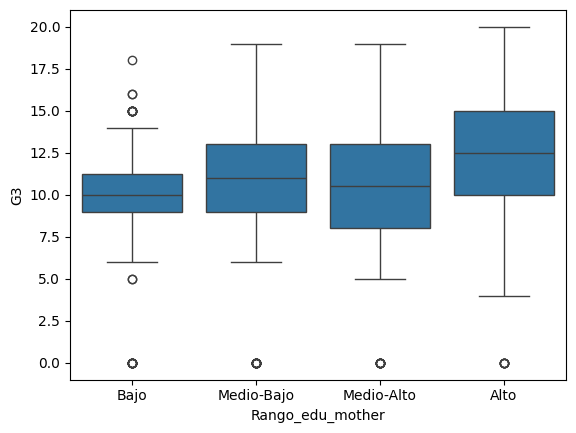

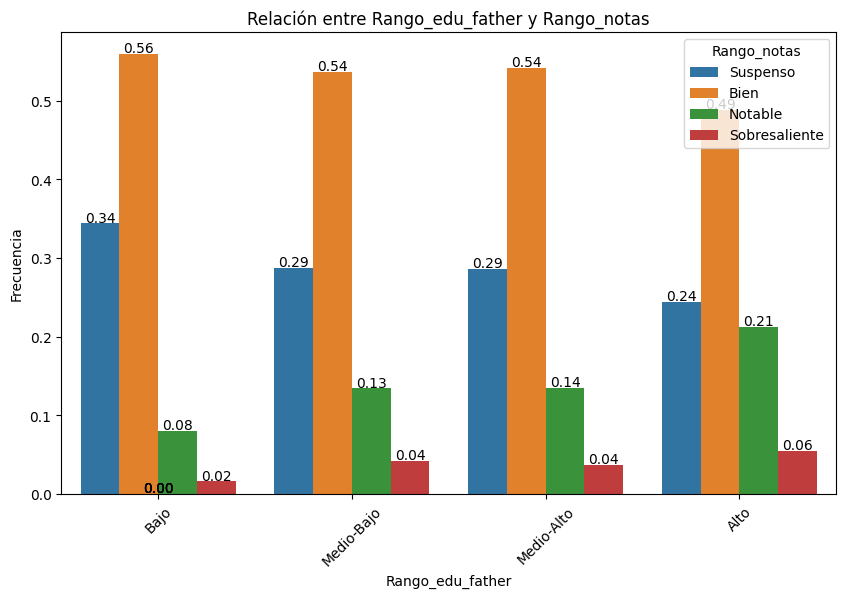

In [37]:
sns.boxplot(x='Rango_edu_mother', y='G3', data=df, vert=True)
plot_categorical_relationship_fin(df, "Rango_edu_father", "Rango_notas", relative_freq=True,  show_values=True, size_group=4)

/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


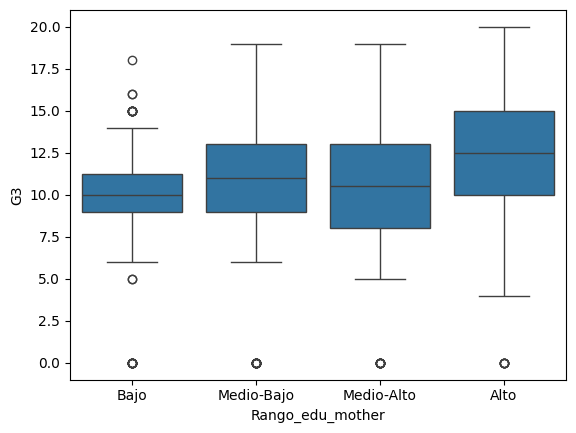

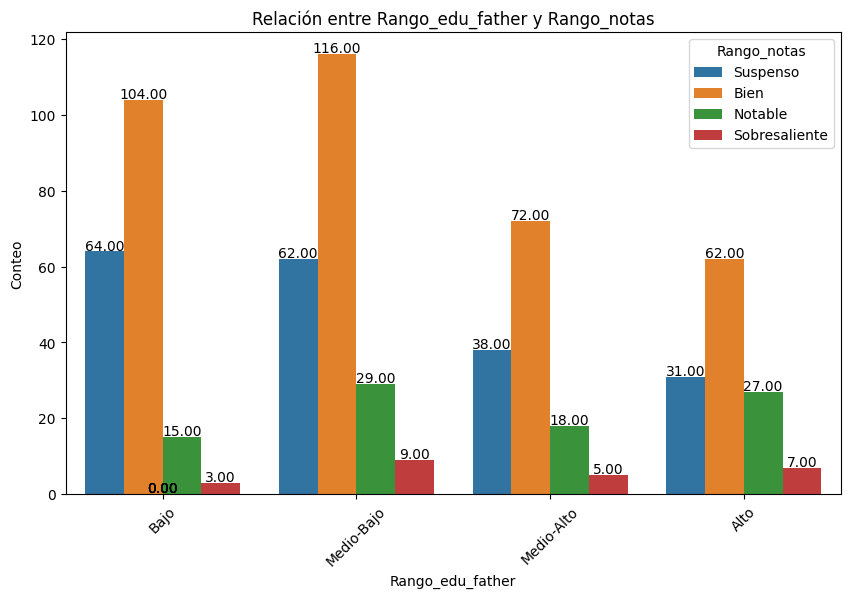

In [38]:
sns.boxplot(x='Rango_edu_mother', y='G3', data=df, vert=True)
plot_categorical_relationship_fin(df, "Rango_edu_father", "Rango_notas", relative_freq=False,  show_values=True, size_group=4)

In [39]:
#sns.boxplot(x='G3', y='Rango_edu_mother', data=df, vert=False)

In [40]:
#sns.boxplot(x='Rango_edu_mother', y='G3', data=df,vert=True)
#sns.swarmplot(x='Rango_edu_mother', y='G3', data=df, color='black', alpha=0.5)

/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


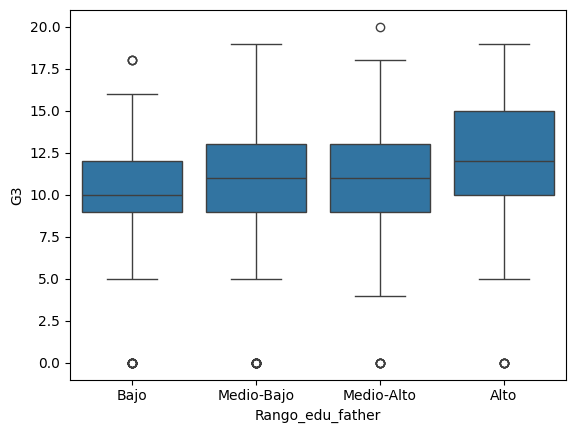

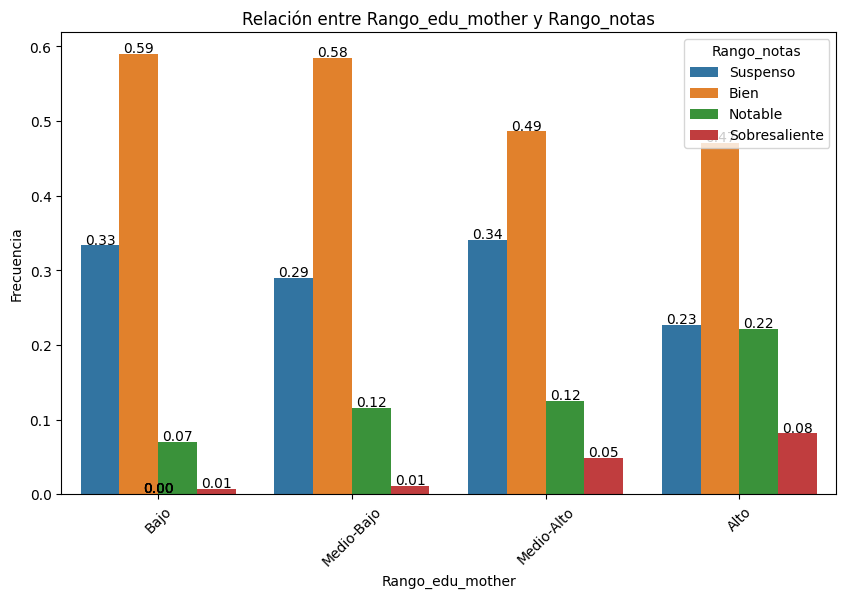

In [85]:
sns.boxplot(x='Rango_edu_father', y='G3', data=df, vert=True)
plot_categorical_relationship_fin(df, "Rango_edu_mother", "Rango_notas", relative_freq=True,  show_values=True, size_group=4)
# Cuanto mayor la educación de la madre, mayor nota puede aspirar

In [1]:
sns.boxplot(x='Rango_edu_father', y='G3', data=df, vert=True)
plot_categorical_relationship_fin(df, "Rango_edu_father", "Rango_notas", relative_freq=True,  show_values=True, size_group=4)
# Cuanto mayor la educación del padre, mayor nota puede aspirar

NameError: name 'sns' is not defined

/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


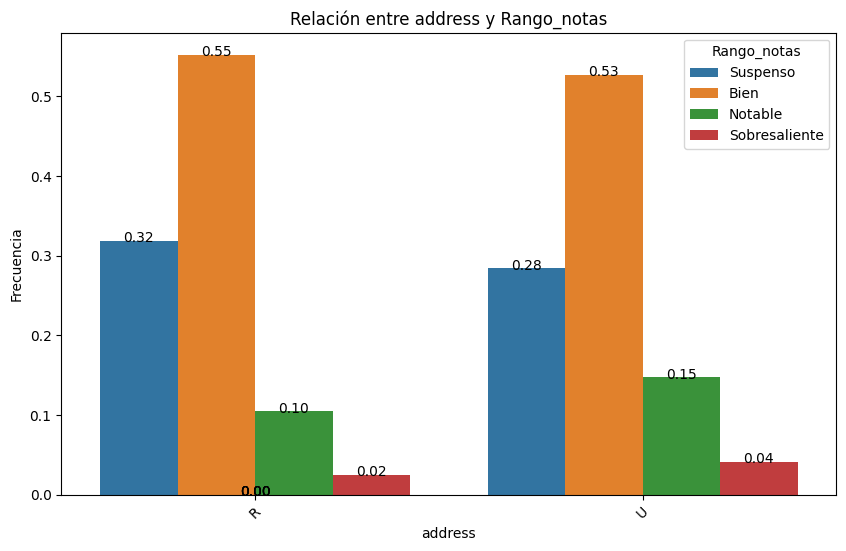

In [43]:
plot_categorical_relationship_fin(df, "address", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

In [44]:
# VEO QUE NO HAY UNA DIFERENCIA ENTRE SER DE PUEBLO O DE CIUDAD EN LA NOTA

In [45]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df['address'], df['Rango_notas'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 3.6806938363102497
P-Value: 0.2980717478106625
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[ 59.20694864 107.48338369  27.02265861   7.28700906]
 [135.79305136 246.51661631  61.97734139  16.71299094]]


In [46]:
# CON ESTO AFIRMAMOS QUE NO HAY RELACIÓN, YA QUE NO PODEMOS NO RECHAZAR LA HIPÓTESIS NULA

# DEPENDIENDO DEL TAM DE LA FAM

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/1725348338.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["famsize","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


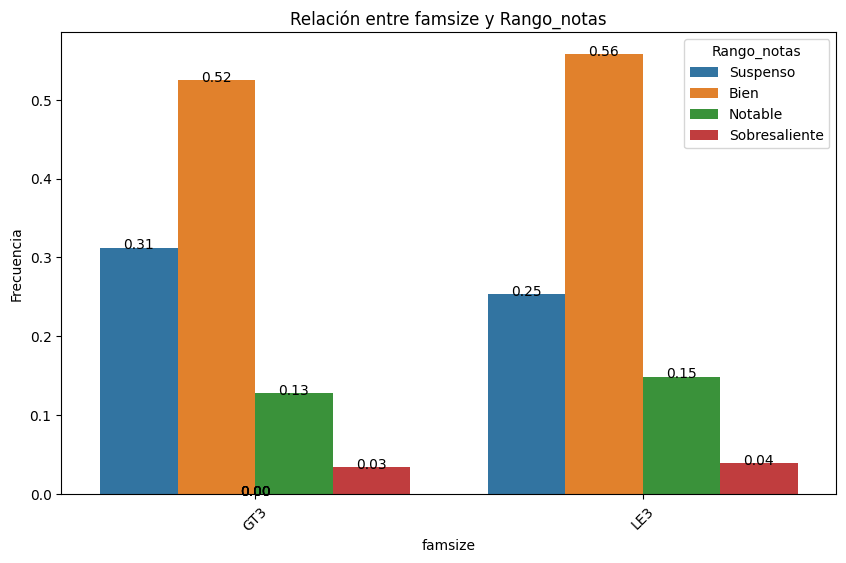

In [47]:
df.groupby(["famsize","Rango_notas"])[["Rango_notas"]].count()
plot_categorical_relationship_fin(df, "famsize", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

In [48]:
# NO VEO NINGUNA DIFERENCIA GRANDE ENTRE SER FAMILIA DE MENOS DE 3 A SERLO DE MÁS

In [49]:
# Por último realizaremos el test de chi-cuadrado, para dar más luz:
#1 Obtenemos la tabla de contingencia

tabla_contingencia = pd.crosstab(df['famsize'], df['Rango_notas'])

#2 Aplicamos la prueba utilizando las herramientas de scipy.stats

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 2.4774049900024897
P-Value: 0.47938835062306384
Grados de Libertad: 3
Tabla de Frecuencias Esperadas:
 [[135.79305136 246.51661631  61.97734139  16.71299094]
 [ 59.20694864 107.48338369  27.02265861   7.28700906]]


In [50]:
# Y CON EL TEST LO REFUTO, YA QUE SUPERA MI ALFA 

# SI ESTAN JUNTO O NO LOS PADRES

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/778070957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Pstatus","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


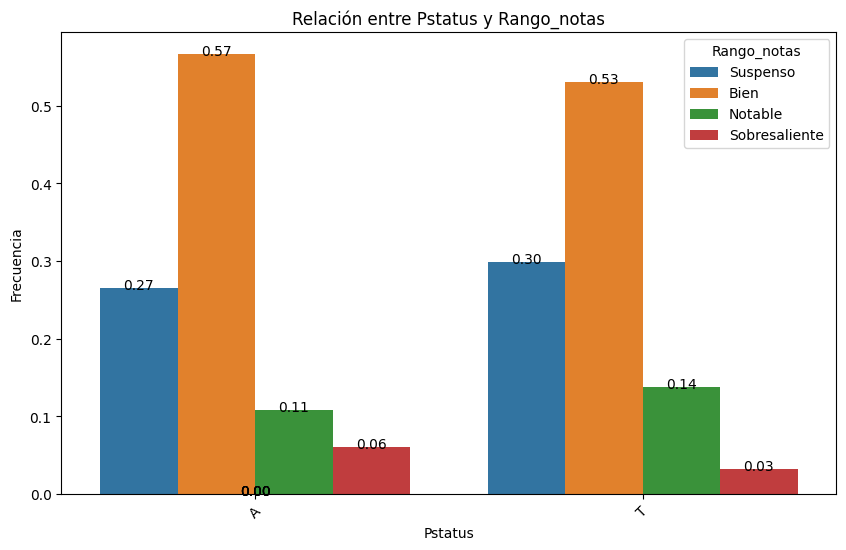

In [51]:
df.groupby(["Pstatus","Rango_notas"])[["Rango_notas"]].count()
plot_categorical_relationship_fin(df, "Pstatus", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

In [52]:
# LAS GRÁFICAS NO ME MUESTRAN NADA CLARO

# POR EL TRABAJO DE LA MADRE

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/1269856490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Mjob","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


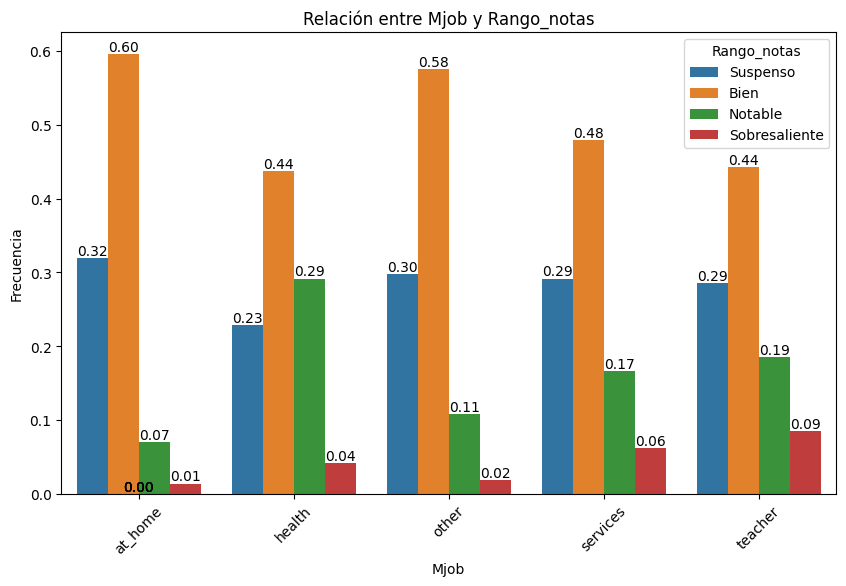

In [53]:
df.groupby(["Mjob","Rango_notas"])[["Rango_notas"]].count()
plot_categorical_relationship_fin(df, "Mjob", "Rango_notas", relative_freq=True, size_group= 5, show_values=True)
# Esto que me puede decir ¿?
# La madres que se dedican al sector de la salud, sus hijos suspenden menos.

In [54]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,G3,Rango_notas,Rango_edu_mother,Rango_edu_father
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,no,4,6,Suspenso,Alto,Alto
1,F,17,U,GT3,T,1,1,at_home,other,father,yes,5,6,Suspenso,Bajo,Bajo
2,F,15,U,LE3,T,1,1,at_home,other,mother,no,4,10,Bien,Bajo,Bajo
3,F,15,U,GT3,T,4,2,health,services,mother,yes,3,15,Notable,Alto,Medio-Bajo
4,F,16,U,GT3,T,3,3,other,other,father,yes,4,10,Bien,Medio-Alto,Medio-Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,other,yes,3,0,Suspenso,Bajo,Bajo
1006,F,18,R,GT3,T,2,2,services,other,mother,no,4,15,Notable,Medio-Bajo,Medio-Bajo
1013,F,18,R,LE3,A,1,2,at_home,other,mother,no,4,15,Notable,Bajo,Medio-Bajo
1027,F,19,R,GT3,T,1,1,at_home,other,other,yes,4,9,Suspenso,Bajo,Bajo


# POR EL TRABAJO DE LA PADRE

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/212719501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Fjob","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


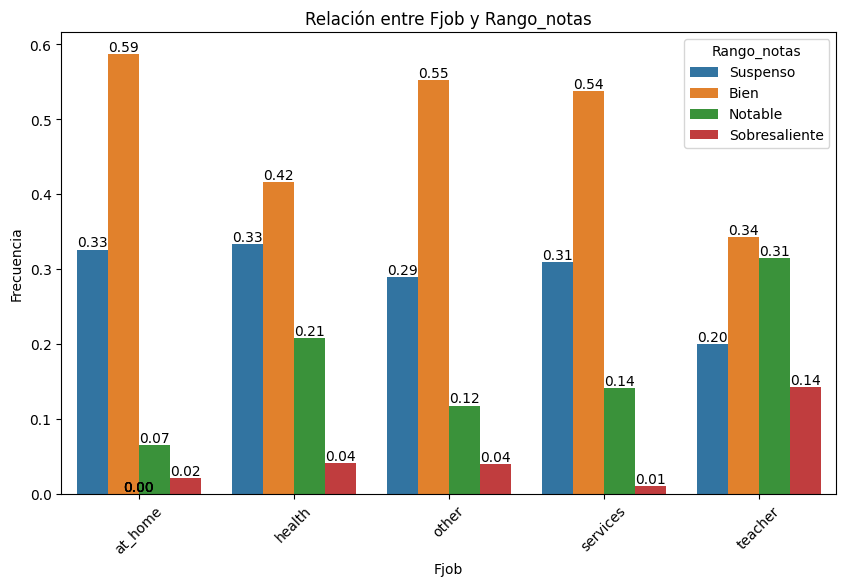

In [55]:
df.groupby(["Fjob","Rango_notas"])[["Rango_notas"]].count()
plot_categorical_relationship_fin(df, "Fjob", "Rango_notas", relative_freq=True, size_group= 5, show_values=True)
# Mientras que los padres que se dedican a la enseñanza, no hay tantos suspensos y son los que generan más sobresalientes con difernecia
# Por lo que este trabajo podría decirme algo

# *AQUÍ PODEMOS VER QUE LOS PADRES QUE SON PROFESORES, EN ESE GRUPO HAY MENOS SUSPENSOS Y MÁS SOBRESALIENTES*

# GUARDIAN

In [56]:
df.groupby(["guardian", "Mjob", "Rango_notas"])[["Rango_notas"]].count()

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/422631419.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["guardian", "Mjob", "Rango_notas"])[["Rango_notas"]].count()


Rango_notas
guardian Mjob     Rango_notas               
father   at_home  Suspenso                 6
                  Bien                    19
                  Notable                  4
                  Sobresaliente            1
         health   Suspenso                 3
                  Bien                     7
                  Notable                  4
                  Sobresaliente            1
         other    Suspenso                16
                  Bien                    47
                  Notable                  7
                  Sobresaliente            0
         services Suspenso                 7
                  Bien                    15
                  Notable                  5
                  Sobresaliente            3
         teacher  Suspenso                 1
                  Bien                     4
                  Notable                  1
                  Sobresaliente            1
mother   at_home  Suspenso                34
                  Bien                    55
                  Notable                  6
                  Sobresaliente            1
         health   Suspenso                 7
                  Bien                    14
                  Notable                  9
                  Sobresaliente            1
         other    Suspenso                47
                  Bien                    92
                  Notable                 18
                  Sobresaliente            5
         services Suspenso                31
                  Bien                    49
                  Notable                 19
                  Sobresaliente            5
         teacher  Suspenso                18
                  Bien                    25
                  Notable                 12
                  Sobresaliente            5
other    at_home  Suspenso                 5
                  Bien                    10
                  Notable                  0
                  Sobresaliente            0
         health   Suspenso                 1
                  Bien                     0
                  Notable                  1
                  Sobresaliente            0
         other    Suspenso                14
                  Bien                    10
                  Notable                  3
                  Sobresaliente            0
         services Suspenso                 4
                  Bien                     5
                  Notable                  0
                  Sobresaliente            1
         teacher  Suspenso                 1
                  Bien                     2
                  Notable                  0
                  Sobresaliente            0

In [57]:
'''
mother	

Suspenso	34
Suspenso	7
Suspenso	47
Suspenso	31
Suspenso	18


at_home	
Bien	55
Notable	6
Sobresaliente	1

health	
Bien	14
Notable	9
Sobresaliente	1

other	
Bien	92
Notable	18
Sobresaliente	5

services	
Bien	49
Notable	19
Sobresaliente	5

teacher	
Bien	25
Notable	12
Sobresaliente	5

'''

'\nmother\t\n\nSuspenso\t34\nSuspenso\t7\nSuspenso\t47\nSuspenso\t31\nSuspenso\t18\n\n\nat_home\t\nBien\t55\nNotable\t6\nSobresaliente\t1\n\nhealth\t\nBien\t14\nNotable\t9\nSobresaliente\t1\n\nother\t\nBien\t92\nNotable\t18\nSobresaliente\t5\n\nservices\t\nBien\t49\nNotable\t19\nSobresaliente\t5\n\nteacher\t\nBien\t25\nNotable\t12\nSobresaliente\t5\n\n'

In [58]:
'''
father	

Suspenso	4
Suspenso	2
Suspenso	14
Suspenso	11
Suspenso	2


at_home	
Bien	7
Notable	1
Sobresaliente	0

health	
Bien	4
Notable	2
Sobresaliente	1

other	
Bien	41
Notable	7
Sobresaliente	4

services	
Bien	35
Notable	8
Sobresaliente	0

teacher	
Bien	5
Notable	3
Sobresaliente	1

---------------------------------------- PADRE CUIDADO
TOTAL_SUSPENSOS --> 4+2+14+11+2 = 33

TOTAL_CASA --> 7+1 = 8
TOTAL_SALUD --> 4+2+1 = 7
TOTAL_OTRO --> 41+7+4 = 52
TOTAL_SERVICIO --> 35+8 = 43
TOTAL_PROFESOR --> 5+3+1 = 9

TOTAL_APROBADOS --> 8+7+52+43+9 = 119

---------------------------------------- MADRE CUIDADO
TOTAL_SUSPENSOS --> 34+7+47+31+18 = 137

TOTAL_CASA --> 55+6+1 = 62
TOTAL_SALUD --> 14+9+1 = 24
TOTAL_OTRO --> 92+18+5 = 115
TOTAL_SERVICIO --> 49+19+5 = 73
TOTAL_PROFE --> 25+12+5 = 42

TOTAL_APROBADOS --> 62+24+115+73+42 = 316
'''

'\nfather\t\n\nSuspenso\t4\nSuspenso\t2\nSuspenso\t14\nSuspenso\t11\nSuspenso\t2\n\n\nat_home\t\nBien\t7\nNotable\t1\nSobresaliente\t0\n\nhealth\t\nBien\t4\nNotable\t2\nSobresaliente\t1\n\nother\t\nBien\t41\nNotable\t7\nSobresaliente\t4\n\nservices\t\nBien\t35\nNotable\t8\nSobresaliente\t0\n\nteacher\t\nBien\t5\nNotable\t3\nSobresaliente\t1\n\n---------------------------------------- PADRE CUIDADO\nTOTAL_SUSPENSOS --> 4+2+14+11+2 = 33\n\nTOTAL_CASA --> 7+1 = 8\nTOTAL_SALUD --> 4+2+1 = 7\nTOTAL_OTRO --> 41+7+4 = 52\nTOTAL_SERVICIO --> 35+8 = 43\nTOTAL_PROFESOR --> 5+3+1 = 9\n\nTOTAL_APROBADOS --> 8+7+52+43+9 = 119\n\n---------------------------------------- MADRE CUIDADO\nTOTAL_SUSPENSOS --> 34+7+47+31+18 = 137\n\nTOTAL_CASA --> 55+6+1 = 62\nTOTAL_SALUD --> 14+9+1 = 24\nTOTAL_OTRO --> 92+18+5 = 115\nTOTAL_SERVICIO --> 49+19+5 = 73\nTOTAL_PROFE --> 25+12+5 = 42\n\nTOTAL_APROBADOS --> 62+24+115+73+42 = 316\n'

In [ ]:
'''
---------------------------------------- OTRO CUIDADO
TOTAL_SUSPENSO --> 5+1+14+4+1 = 25

TOTAL_CASA --> 10
TOTAL_SALUD --> 1
TOTAL_OTRO --> 13
TOTAL_SERVICIO --> 6
TOTAL_PROFESOR --> 2

TOTAL_APROBADOS --> 32

other	

Suspenso	5
Suspenso	1
Suspenso	14
Suspenso	4
Suspenso	1


at_home	

Bien	10
Notable	0
Sobresaliente	0

health	

Bien	0
Notable	1
Sobresaliente	0

other	

Bien	10
Notable	3
Sobresaliente	0

services
Bien	5
Notable	0
Sobresaliente	1

teacher	
Bien	2
Notable	0
Sobresaliente	0

'''

In [60]:
df.groupby(["guardian", "Fjob", "Rango_notas"])[["Rango_notas"]].count()

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/110881493.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["guardian", "Fjob", "Rango_notas"])[["Rango_notas"]].count()


Rango_notas
guardian Fjob     Rango_notas               
father   at_home  Suspenso                 4
                  Bien                     7
                  Notable                  1
                  Sobresaliente            0
         health   Suspenso                 2
                  Bien                     4
                  Notable                  2
                  Sobresaliente            1
         other    Suspenso                14
                  Bien                    41
                  Notable                  7
                  Sobresaliente            4
         services Suspenso                11
                  Bien                    35
                  Notable                  8
                  Sobresaliente            0
         teacher  Suspenso                 2
                  Bien                     5
                  Notable                  3
                  Sobresaliente            1
mother   at_home  Suspenso                 8
                  Bien                    17
                  Notable                  2
                  Sobresaliente            1
         health   Suspenso                 6
                  Bien                     5
                  Notable                  3
                  Sobresaliente            0
         other    Suspenso                79
                  Bien                   148
                  Notable                 33
                  Sobresaliente           10
         services Suspenso                39
                  Bien                    58
                  Notable                 18
                  Sobresaliente            2
         teacher  Suspenso                 5
                  Bien                     7
                  Notable                  8
                  Sobresaliente            4
other    at_home  Suspenso                 3
                  Bien                     3
                  Notable                  0
                  Sobresaliente            0
         health   Suspenso                 0
                  Bien                     1
                  Notable                  0
                  Sobresaliente            0
         other    Suspenso                15
                  Bien                    17
                  Notable                  4
                  Sobresaliente            1
         services Suspenso                 7
                  Bien                     6
                  Notable                  0
                  Sobresaliente            0
         teacher  Suspenso                 0
                  Bien                     0
                  Notable                  0
                  Sobresaliente            0

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/1039953097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["guardian","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


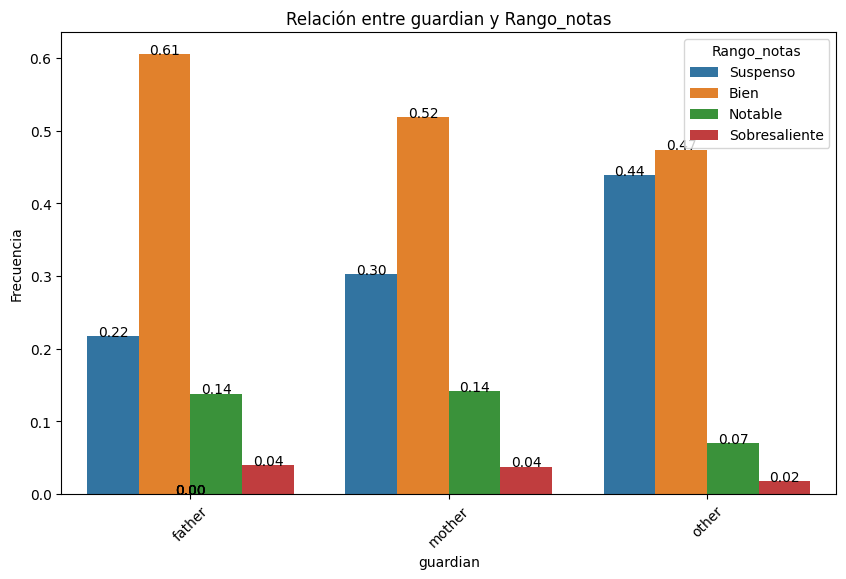

In [61]:
df.groupby(["guardian","Rango_notas"])[["Rango_notas"]].count()
plot_categorical_relationship_fin(df, "guardian", "Rango_notas", relative_freq=True, size_group= 3, show_values=True)

# DEPENDE DE SI ESTAN BAJO EL CUIDADO DE ALGUNO O DE SI ESTÁN JUNTOS O NO

# FAMSUP

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/3786413607.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["famsup","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


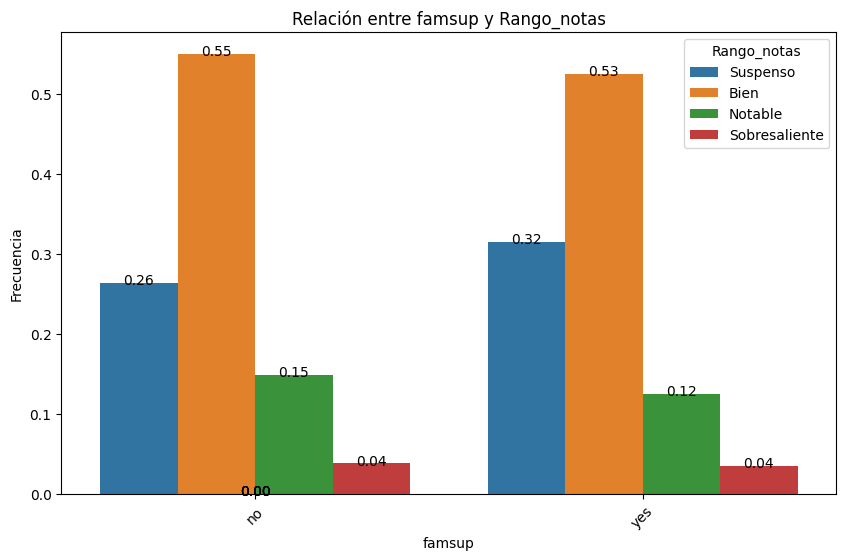

In [62]:
df.groupby(["famsup","Rango_notas"])[["Rango_notas"]].count()
plot_categorical_relationship_fin(df, "famsup", "Rango_notas", relative_freq=True, size_group= 2, show_values=True)

In [63]:
# SORPRENDENTEMENTE LOS ESTUDIANTES QUE NO TIENEN EL APOYO FAMILIAR, SUSPENDEN MENOS Y EN GENERAL APRUEBAN MÁS.
# AUNQUE TAMBIÉN LA MUESTRA DE ES MENOR CON RESPECTO A LOS QUE SÍ SON APOYADOS

# FAMREL

In [64]:
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,G3,Rango_notas,Rango_edu_mother,Rango_edu_father
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,no,4,6,Suspenso,Alto,Alto
1,F,17,U,GT3,T,1,1,at_home,other,father,yes,5,6,Suspenso,Bajo,Bajo
2,F,15,U,LE3,T,1,1,at_home,other,mother,no,4,10,Bien,Bajo,Bajo
3,F,15,U,GT3,T,4,2,health,services,mother,yes,3,15,Notable,Alto,Medio-Bajo
4,F,16,U,GT3,T,3,3,other,other,father,yes,4,10,Bien,Medio-Alto,Medio-Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,F,19,R,GT3,A,1,1,at_home,at_home,other,yes,3,0,Suspenso,Bajo,Bajo
1006,F,18,R,GT3,T,2,2,services,other,mother,no,4,15,Notable,Medio-Bajo,Medio-Bajo
1013,F,18,R,LE3,A,1,2,at_home,other,mother,no,4,15,Notable,Bajo,Medio-Bajo
1027,F,19,R,GT3,T,1,1,at_home,other,other,yes,4,9,Suspenso,Bajo,Bajo


In [65]:
df.famrel.min() #1
df.famrel.max() #5

np.int64(5)

In [66]:
rangos = [1, 3, 4, 5]
etiquetas = ["Baja", "Media", "Alta"]
df['Rango_fam_rel'] = pd.cut(df['famrel'], bins=rangos, labels=etiquetas, include_lowest=True)

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/923921995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rango_fam_rel'] = pd.cut(df['famrel'], bins=rangos, labels=etiquetas, include_lowest=True)


/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/1908299287.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Rango_fam_rel","Rango_notas"])[["Rango_notas"]].count()
/Users/lilchoco/DS/EDA-AYMC/bootcampviztools.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


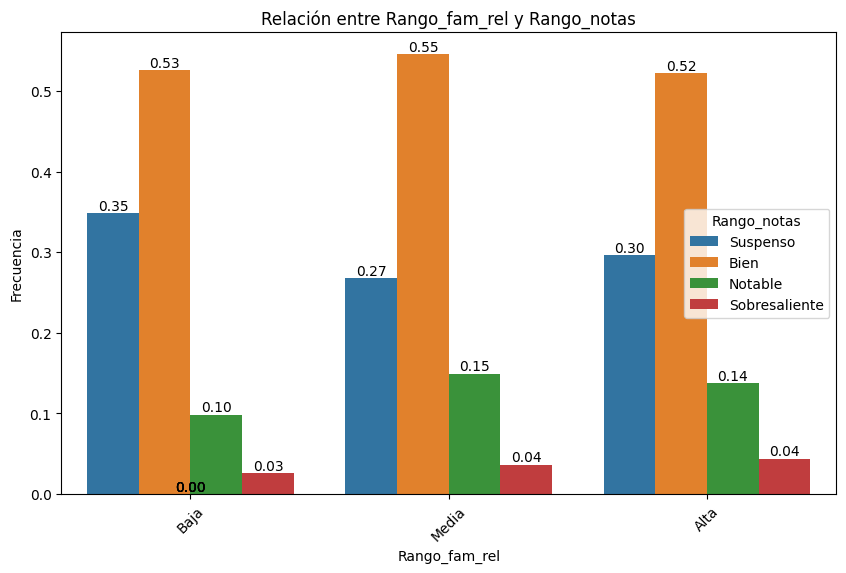

In [71]:
df.groupby(["Rango_fam_rel","Rango_notas"])[["Rango_notas"]].count()
plot_categorical_relationship_fin(df, "Rango_fam_rel", "Rango_notas", relative_freq=True, size_group= 5, show_values=True)


In [72]:
df["Aprobar"] = df.G3 >= 10

/var/folders/p5/6rqhcfqd2h5d4nnr61kzgnt00000gn/T/ipykernel_13774/4060591623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aprobar"] = df.G3 >= 10


# CONCLUSIONES PARA APROBAR

In [73]:
mask = df.Aprobar
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Medio-Bajo,Medio-Bajo,Media,other,other,mother,yes


# COMO SON LAS CONDICIONES DE LOS QUE SUSPENDEN 

In [74]:
mask = df.Aprobar == False
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Medio-Bajo,Bajo,Media,other,other,mother,yes


In [75]:
# RECOMENDACIONES PARA LLEGAR AL BIEN

In [76]:
mask = df.Rango_notas == "Bien"
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Medio-Bajo,Medio-Bajo,Media,other,other,mother,yes


In [77]:
# RECOMENDACIONES PARA LLEGAR AL NOTABLE

In [78]:
mask = df.Rango_notas == "Notable"
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Alto,Medio-Bajo,Media,other,other,mother,yes


In [79]:
# RECOMENDACIONES PARA LLEGAR AL SOBRESALEINTE

In [80]:
mask = df.Rango_notas == "Sobresaliente"
df[mask][["address", "famsize", "Pstatus", "Rango_edu_mother", "Rango_edu_father", "Rango_fam_rel", "Mjob", "Mjob", "guardian", "famsup"]].mode()

,address,famsize,Pstatus,Rango_edu_mother,Rango_edu_father,Rango_fam_rel,Mjob,Mjob,guardian,famsup
0,U,GT3,T,Alto,Medio-Bajo,Media,services,services,mother,yes
